In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
class Maze:
    def __init__(self, mat, h, w, start):
        self.matrix = mat
        self.height = h
        self.width = w
        self.start = start
    
    def show(self):
        image = []
        for row in self.matrix:
            new_row = []
            for val in row:
                if val == 0:
                    new_row.append([0., 0., 0.])
                elif val == 1:
                    new_row.append([1., 1., 1.])
                else:
                    new_row.append([0.68, 0.97, 0.1])
            image.append(new_row)
        plt.imshow(np.array(image), cmap='gray')
        plt.axis('off')
             
    def ispath(self, pos):
        r, c = pos
        if r < 0 or r >= self.height or c < 0 or c >= self.width:
            return False
        
        return self.matrix[r][c] != 0
    
    def reachedout(self, pos):
        if pos == self.start:
            return False
        
        r, c = pos
        
        if r == 0 or r == self.height-1 or c == 0 or c == self.width-1:
            return True
        else:
            return False
    
    def tracepath(self, traversal):
        for r, c in traversal:
            self.matrix[r][c] = 0.5
            
    def getstart(self):
        return self.start

In [3]:
def mazesolve(maze):
    visited = []
    for i in range(maze.height):
        visited.append([0 for j in range(maze.width)])
        
    traversal = []
    
    dfs(maze, maze.getstart(), visited, traversal)
    
    maze.tracepath(traversal)
    


    
def dfs(maze, pos, visited, traversal):
    r, c = pos
    visited[r][c] = 1
    traversal.append(pos)
    
    if maze.reachedout(pos):
        return True
    
    if maze.ispath((r-1, c)) and visited[r-1][c] == 0:
        if dfs(maze, (r-1, c), visited, traversal):
            return True
    
    if maze.ispath((r, c+1)) and visited[r][c+1] == 0:
        if dfs(maze, (r, c+1), visited, traversal):
            return True
    
    if maze.ispath((r+1, c)) and visited[r+1][c] == 0:
        if dfs(maze, (r+1, c), visited, traversal):
            return True
    
    if maze.ispath((r, c-1)) and visited[r][c-1] == 0:
        if dfs(maze, (r, c-1), visited, traversal):
            return True
    
    traversal.pop()
    return False

In [4]:
mat = [
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0],
    [0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0],
    [0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,0,1,0,1,0,1,1,1,1,1,1,1,0,1,1,1,0,1,0,1,0],
    [0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0],
    [0,1,1,1,0,1,1,1,0,1,0,1,0,1,1,1,1,1,0,1,0,1,0,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,0],
    [0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0],
    [0,1,0,1,1,1,0,1,0,1,0,1,1,1,1,1,0,1,1,1,0,1,1,1,0,1,0,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,0,1,0],
    [0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0],
    [0,1,0,1,0,1,1,1,0,1,1,1,1,1,0,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,1,1,0,1,1,1,1,1,0,1,0,1,0],
    [0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0],
    [0,1,0,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,0,1,0],
    [0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0],
    [0,1,0,1,0,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,0,1,0,1,1,1,0,1,1,1,1,1,0,1,1,1,0,1,0,1,0],
    [0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0],
    [0,1,0,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,0,1,0,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0],
    [0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
    [1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,1,0],
    [0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0],
    [0,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,0,1,1,1,0,1,1,1,1,1,0,1,1,1,0,1,0,1,1,1,0,1,1,1,1],
    [0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0],
    [0,1,1,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,0,1,0,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,0],
    [0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0],
    [0,1,0,1,1,1,1,1,1,1,0,1,1,1,0,1,0,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,0],
    [0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0],
    [0,1,0,1,1,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,1,0],
    [0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0],
    [0,1,0,1,0,1,1,1,0,1,1,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,0],
    [0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0],
    [0,1,0,1,1,1,0,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,1,1,0,1,1,1,0,1,1,1,0,1,0],
    [0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0],
    [0,1,0,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,1,1,1,0,1,1,1,0,1,0,1,1,1,0,1,0],
    [0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0],
    [0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
]

In [5]:
maze = Maze(mat, 35, 45, (17,0))

Initial Maze:


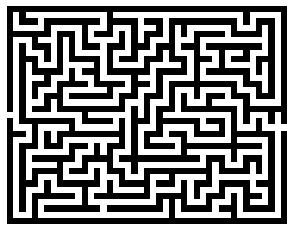

In [6]:
print("Initial Maze:")
maze.show()

In [7]:
mazesolve(maze)

Solved Maze:


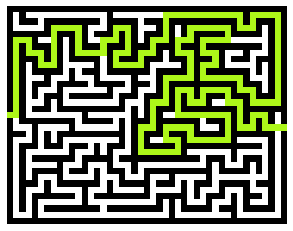

In [8]:
print("Solved Maze:")
maze.show()